In [1]:
%load_ext autoreload
%autoreload 2
from functions import *

Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██████████| 3000/3000 [00:54<00:00, 55.54it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


                     mean        sd  mc_error   hpd_2.5  hpd_97.5
Intercept        0.024693  0.025852  0.000462 -0.021121  0.079351
Gigabytes        0.124842  0.006063  0.000114  0.113637  0.137484
Hostprovider1    0.554582  0.047548  0.001018  0.464225  0.647013
Hostprovider2    0.261461  0.048572  0.001035  0.163332  0.351771
Hostprovider3    0.129880  0.048490  0.001036  0.028010  0.219148
Minutes          0.267167  0.009104  0.000167  0.249524  0.284464
Payment         -0.039935  0.033428  0.000574 -0.105979  0.023859
Personalization -0.089746  0.032004  0.000517 -0.152693 -0.029130
Price           -0.318383  0.012158  0.000207 -0.341188 -0.294262
Quantitysim2     0.132868  0.039929  0.000771  0.055725  0.212148
Quantitysim3     0.172824  0.039714  0.000815  0.096021  0.252423


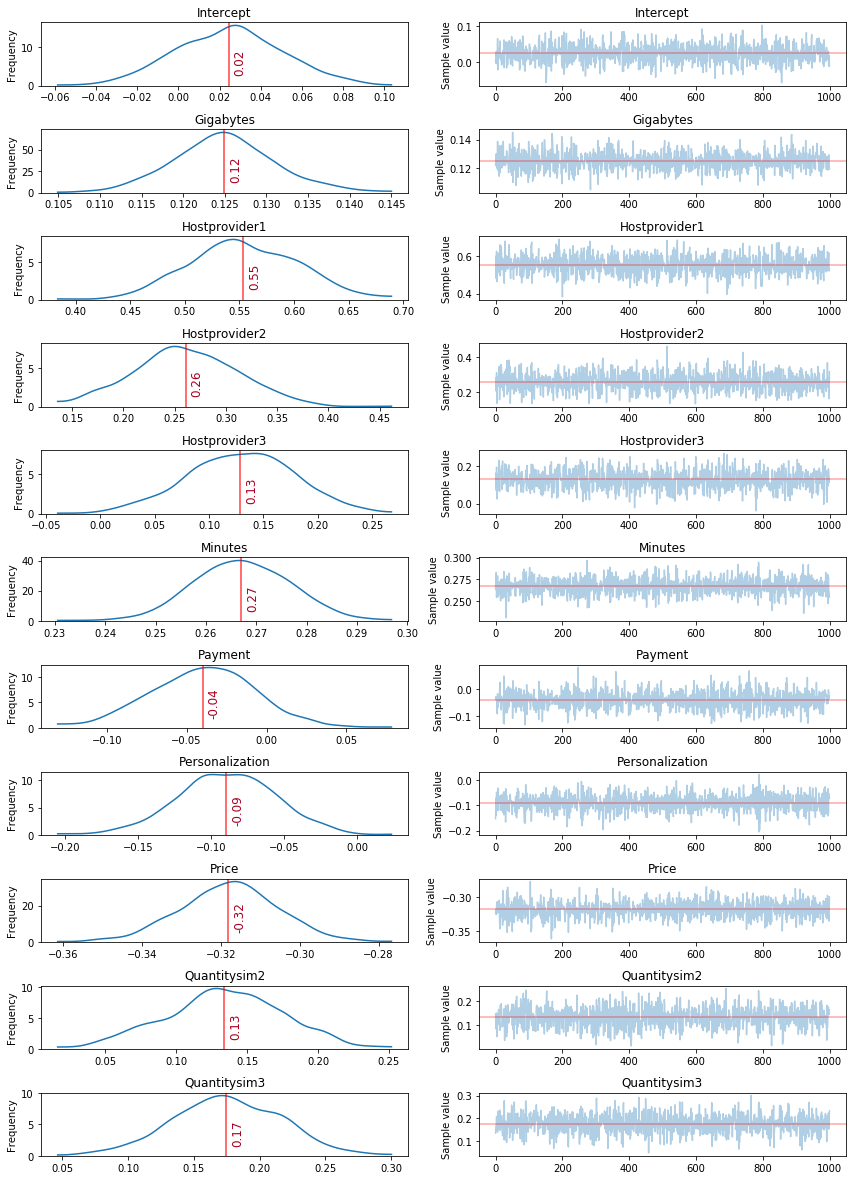

In [2]:
df, meta = pyreadstat.read_sav('conjoint_host_sim_dummy.sav')
for n in range(1, 8):
    df['T{0}_select'.format(n)] = df['T{0}_select'.format(n)].astype(int)
features = np.delete(np.unique(list(map(lambda x: x[x.rindex('_')+1:], df.columns[2:]))), -1)
df_diff = diff_model(df, features)
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('target ~ {0}'.format(' '.join(list(map(lambda x: str(x)+' '+'+', df_diff.columns[:-1])))[:-2]),
                            data=df_diff, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(2000, step=pm.NUTS(), chains=1, tune=1000)
plot_traces(trace_logistic_model);
print(pm.summary(trace_logistic_model))

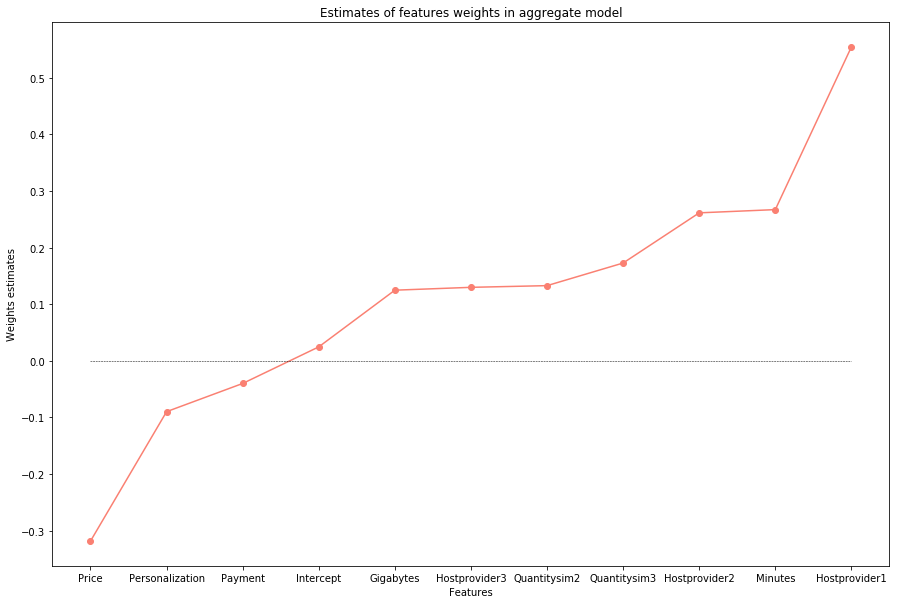

In [3]:
estimates_agg = pm.summary(trace_logistic_model)['mean'].values
plt.figure(figsize=(15, 10))
plt.plot(range(11), sorted(estimates_agg), color='Salmon', marker='o')
plt.plot(range(11), np.zeros(11), linestyle='--', linewidth=0.5, c='Black')
plt.xticks(range(11), np.append(['Intercept'], features)[np.argsort(estimates_agg)])
plt.yticks(np.arange(-0.3, 0.6, 0.1))
plt.xlabel('Features')
plt.ylabel('Weights estimates')
plt.title('Estimates of features weights in aggregate model')
plt.savefig('Aggregate_model.png')
plt.show()

In [4]:
priors = dict()
priors['Intercept'] = pm.Laplace.dist(0, 0.2)
priors['Gigabytes'] = pm.HalfStudentT.dist(20, 0.18)
priors['Hostprovider1'] = pm.HalfStudentT.dist(20, 0.8)
priors['Hostprovider2'] = pm.Lognormal.dist(-1.3, 1)
priors['Hostprovider3'] = pm.Lognormal.dist(-2, 1)
priors['Minutes'] = pm.Lognormal.dist(-1.3, 1.5)
priors['Payment'] = pm.Lognormal.dist(-3.2, 1)
priors['Personalization'] = pm.Lognormal.dist(-2.5, 1)
priors['Price'] = pm.Wald.dist(0.5, 0.5)
priors['Quantitysim2'] = pm.HalfStudentT.dist(20, 0.2)
priors['Quantitysim3'] = pm.Wald.dist(0.2, 0.5)

In [7]:
%time names_estimates = parallel_function(personal_model, (df, features, 'bayes', priors, len(df)))
estimates = np.hstack((np.expand_dims(names_estimates[:, 0], -1), names_estimates[:, 11:]))

Process Process-20 started!
Process Process-21 started!
Process Process-22 started!
Process Process-23 started!
Process Process-24 started!
Process Process-26 started!
Process Process-25 started!
Process Process-27 started!


INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10668')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10667')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
  2%|▏         | 68/3000 [00:00<00:54, 54.28it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10669' (I am process '10673')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lo

['Intercept', 'Gigabytes_log__', 'Hostprovider1_log__', 'Hostprovider2_log__', 'Hostprovider3_log__', 'Minutes_log__', 'Payment_log__', 'Personalization_log__', 'Price_log__', 'Quantitysim2_log__', 'Quantitysim3_log__', 'Gigabytes', 'Hostprovider1', 'Hostprovider2', 'Hostprovider3', 'Minutes', 'Payment', 'Personalization', 'Price', 'Quantitysim2', 'Quantitysim3']


 73%|███████▎  | 2189/3000 [00:26<00:09, 86.61it/s]

[ 0.03778916 -1.91899195 -0.73104356 -1.00606643 -2.20689042 -0.05863487
 -3.27309812 -2.59162943 -0.41425768 -2.32935796 -1.76001043  0.1972774
  0.70852256  0.57909097  0.1589752   1.07458498  0.05900972  0.11897177
  0.78784396  0.14818569  0.20549527]


 99%|█████████▊| 2957/3000 [00:34<00:00, 119.35it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
  4%|▎         | 107/3000 [00:01<00:37, 76.61it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
  5%|▍         | 145/3000 [00:02<00:36, 78.45it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10670')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 33%|███▎      | 993/3000 [00:08<00:13, 145.96it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Us

['Intercept', 'Gigabytes_log__', 'Hostprovider1_log__', 'Hostprovider2_log__', 'Hostprovider3_log__', 'Minutes_log__', 'Payment_log__', 'Personalization_log__', 'Price_log__', 'Quantitysim2_log__', 'Quantitysim3_log__', 'Gigabytes', 'Hostprovider1', 'Hostprovider2', 'Hostprovider3', 'Minutes', 'Payment', 'Personalization', 'Price', 'Quantitysim2', 'Quantitysim3']


 93%|█████████▎| 2789/3000 [00:31<00:02, 83.30it/s]

[-0.23799378 -2.17279524 -0.75140768 -1.44654096 -2.31382109 -0.80866894
 -3.13977818 -2.08482136 -1.12352455 -2.610393   -1.79485674  0.15039987
  0.64989312  0.33106856  0.13916228  0.5026758   0.0732195   0.23127689
  0.38068023  0.11598662  0.19470555]

  2%|▏         | 71/3000 [00:01<00:53, 54.97it/s]

 35%|███▌      | 1063/3000 [00:11<00:19, 101.02it/s]INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '10671')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
  8%|▊         | 246/3000 [00:03<00:27, 101.87it/s] Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 17%|█▋        | 519/3000 [00:07<00:30, 81.46it/s]] INFO (theano.gof.compilelock): Waiting for existing lock by process '10541' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 30%|███       | 905/3000 [00:10<00:20, 104.65it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10541' (I am process '1

 14%|█▍        | 432/3000 [00:04<00:24, 105.66it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10667')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 27%|██▋       | 797/3000 [00:07<00:20, 105.11it/s]]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 96%|█████████▋| 2895/3000 [00:26<00:01, 83.87it/s] INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10667')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 76%|███████▌  | 2281/3000 [00:22<00:07, 96.05it/s] Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personaliz

100%|██████████| 3000/3000 [00:15<00:00, 199.96it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 25%|██▌       | 760/3000 [00:05<00:16, 133.95it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10667')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 49%|████▊     | 1456/3000 [00:09<00:11, 130.59it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 60%|█████▉    | 1790/3000 [00:12<00:11, 104.33it/s]Sequent

INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 76%|███████▋  | 2294/3000 [00:19<00:05, 132.73it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 69%|██████▉   | 2068/3000 [00:20<00:09, 99.61it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10541' (I am process '10673')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
100%|██████████| 3000/3000 [00:28<00:00, 104.18it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Pe

  5%|▍         | 148/3000 [00:00<00:19, 147.00it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 12%|█▏        | 366/3000 [00:01<00:12, 217.72it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10673' (I am process '10671')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 30%|██▉       | 885/3000 [00:05<00:14, 149.85it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10672')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10670')
INFO (theano.gof.compilelock): To manually rele

  3%|▎         | 99/3000 [00:01<00:30, 94.53it/s]/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10542' (I am process '10669')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
  8%|▊         | 239/3000 [00:02<00:23, 116.56it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 61%|██████▏   | 1840/3000 [00:14<00:11, 104.88it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 78%|███████▊  | 2342/3000 [00:19<00:05, 122.30it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10669' (I am process '1

 92%|█████████▏| 2755/3000 [00:27<00:02, 90.94it/s] INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10669')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 94%|█████████▎| 2809/3000 [00:28<00:01, 96.88it/s] INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 77%|███████▋  | 2304/3000 [00:17<00:02, 311.68it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
  6%|▌         | 174/3000 [00:00<00:10, 268.99it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10536' (I am process '1

 64%|██████▎   | 1909/3000 [00:21<00:12, 87.96it/s] INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10668')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 69%|██████▉   | 2073/3000 [00:23<00:11, 80.26it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 47%|████▋     | 1422/3000 [00:12<00:10, 147.93it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
  4%|▎         | 112/3000 [00:01<00:31, 91.04it/s]]]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigab

 48%|████▊     | 1437/3000 [00:14<00:12, 124.77it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10673')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 68%|██████▊   | 2025/3000 [00:20<00:07, 133.13it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10541' (I am process '10672')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 72%|███████▏  | 2174/3000 [00:18<00:04, 171.26it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 89%|████████▉ | 2678/3000 [00:21<00:02, 110.68it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10541' (I am process '1

 92%|█████████▏| 2754/3000 [00:29<00:02, 90.04it/s] INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
100%|██████████| 3000/3000 [00:28<00:00, 104.02it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 14%|█▍        | 417/3000 [00:02<00:10, 253.27it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 26%|██▋       | 793/3000 [00:04<00:11, 189.85it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10541' (I am 

 39%|███▉      | 1172/3000 [00:06<00:06, 262.30it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
  0%|          | 14/3000 [00:00<00:22, 135.70it/s]]]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 33%|███▎      | 985/3000 [00:05<00:14, 138.60it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10667')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 71%|███████   | 2125/3000 [00:14<00:08, 107.86it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10669' (I am process '10667')
INFO (theano.gof.compilelock): To manually release the lock, delete

 94%|█████████▎| 2807/3000 [00:22<00:01, 118.07it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10669' (I am process '10667')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
100%|██████████| 3000/3000 [00:23<00:00, 128.91it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 86%|████████▋ | 2594/3000 [00:16<00:01, 247.46it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10674' (I am process '10672')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 89%|████████▉ | 2665/3000 [00:16<00:01, 291.12it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██

100%|██████████| 3000/3000 [00:16<00:00, 180.02it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 42%|████▏     | 1261/3000 [00:11<00:11, 156.10it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10536' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 50%|████▉     | 1497/3000 [00:12<00:10, 139.58it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10670')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 64%|██████▍   | 1913/3000 [00:13<00:06, 179.88it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10672')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano

INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 53%|█████▎    | 1593/3000 [00:11<00:11, 117.69it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 97%|█████████▋| 2902/3000 [00:21<00:00, 122.28it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 15%|█▌        | 455/3000 [00:03<00:18, 140.60it/s]]INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10673')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 75%|███████▍  | 2238/3000 [00:17<00:05, 128.43it/s]Sequent

100%|██████████| 3000/3000 [00:19<00:00, 151.16it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 70%|██████▉   | 2090/3000 [00:11<00:04, 217.65it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 19%|█▊        | 557/3000 [00:05<00:19, 127.45it/s]]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 24%|██▎       | 705/3000 [00:06<00:17, 131.48it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10673' (I am process '10668')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 30%|███       | 912/3000 [00:07<00:11, 189.80it/s]Sequential sampling (1 chains i

 74%|███████▎  | 2210/3000 [00:08<00:03, 245.46it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10541' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
  1%|          | 27/3000 [00:00<00:28, 103.41it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
  1%|▏         | 43/3000 [00:00<00:39, 75.04it/s]/s]INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '10671')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 23%|██▎       | 703/3000 [00:04<00:11, 205.27it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalizati

 63%|██████▎   | 1893/3000 [00:06<00:04, 234.68it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10674' (I am process '10671')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 38%|███▊      | 1140/3000 [00:03<00:08, 231.48it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 73%|███████▎  | 2177/3000 [00:08<00:04, 205.61it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10673' (I am process '10667')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 47%|████▋     | 1399/3000 [00:04<00:07, 201.54it/s]INFO (th

 19%|█▉        | 572/3000 [00:02<00:11, 211.20it/s]]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██████████| 3000/3000 [00:12<00:00, 231.67it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 3000/3000 [00:12<00:00, 236.80it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 48%|████▊     | 1441/3000 [00:06<00:07, 218.21it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 57%|█████▋    | 1704/3000 [00:07<00:05, 216.03it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10674' (I am process '10668')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir

INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 36%|███▋      | 1088/3000 [00:03<00:07, 265.84it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 56%|█████▋    | 1691/3000 [00:05<00:04, 276.83it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 75%|███████▍  | 2238/3000 [00:07<00:02, 309.29it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10667')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
100%|██████████| 3000/3000 [00:10<00:00, 292.20it/s]
Only o

  1%|▏         | 41/3000 [00:00<00:16, 175.84it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10669' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 50%|█████     | 1503/3000 [00:03<00:03, 439.65it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 75%|███████▌  | 2264/3000 [00:05<00:01, 465.39it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10537' (I am process '10674')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 70%|███████   | 2106/3000 [00:05<00:02, 346.20it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalizat

Process Process-25 finished!


 72%|███████▏  | 2147/3000 [00:09<00:03, 233.66it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 99%|█████████▊| 2961/3000 [00:09<00:00, 324.26it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██████████| 3000/3000 [00:09<00:00, 308.44it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 79%|███████▉  | 2371/3000 [00:07<00:01, 323.65it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██████████| 3000/3000 [00:08<00:00, 364.84it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 61%|██████    | 1

Process Process-24 finished!


INFO (theano.gof.compilelock): Waiting for existing lock by process '10536' (I am process '10669')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 93%|█████████▎| 2804/3000 [00:08<00:00, 352.50it/s]There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|█████████▉| 2992/3000 [00:08<00:00, 308.43it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10669')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
100%|██████████| 3000/3000 [00:08<00:00, 335.45it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, P

Process Process-23 finished!


INFO (theano.gof.compilelock): Waiting for existing lock by process '10668' (I am process '10667')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
 41%|████▏     | 1241/3000 [00:04<00:04, 383.97it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██████████| 3000/3000 [00:09<00:00, 310.30it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 3000/3000 [00:08<00:00, 336.26it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 76%|███████▌  | 2271/3000 [00:06<00:01, 385.82it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '10673' (I am process '10668')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvi

Process Process-20 finished!


Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 81%|████████▏ | 2438/3000 [00:05<00:01, 405.20it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 15%|█▌        | 450/3000 [00:01<00:05, 468.84it/s]There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks
 87%|████████▋ | 2621/3000 [00:05<00:00, 519.88it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██████████| 3000/3000 [00:06<00:00, 492.79it/s]
Only one chain was sampled, this makes it impossible to run some convergenc

100%|██████████| 3000/3000 [00:06<00:00, 440.57it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 90%|████████▉ | 2696/3000 [00:05<00:00, 400.14it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██████████| 3000/3000 [00:06<00:00, 461.82it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
 19%|█▉        | 573/3000 [00:01<00:05, 435.90it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██████████| 3000/3000 [00:06<00:00, 489.36it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, H

Process Process-26 finished!


100%|██████████| 3000/3000 [00:06<00:00, 463.83it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
INFO (theano.gof.compilelock): Waiting for existing lock by process '10669' (I am process '10668')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/aktsvigun/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.7-64/lock_dir
Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██████████| 3000/3000 [00:05<00:00, 525.86it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
 97%|█████████▋| 2909/3000 [00:05<00:00, 492.89it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Q

Process Process-27 finished!


 82%|████████▏ | 2453/3000 [00:05<00:01, 405.32it/s]Sequential sampling (1 chains in 1 job)
NUTS: [Quantitysim3, Quantitysim2, Price, Personalization, Payment, Minutes, Hostprovider3, Hostprovider2, Hostprovider1, Gigabytes, Intercept]
100%|██████████| 3000/3000 [00:06<00:00, 462.53it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 3000/3000 [00:07<00:00, 394.23it/s]
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Process Process-21 finished!


100%|██████████| 3000/3000 [00:05<00:00, 523.69it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


Process Process-22 finished!
CPU times: user 33.5 s, sys: 18.8 s, total: 52.3 s
Wall time: 33min 27s


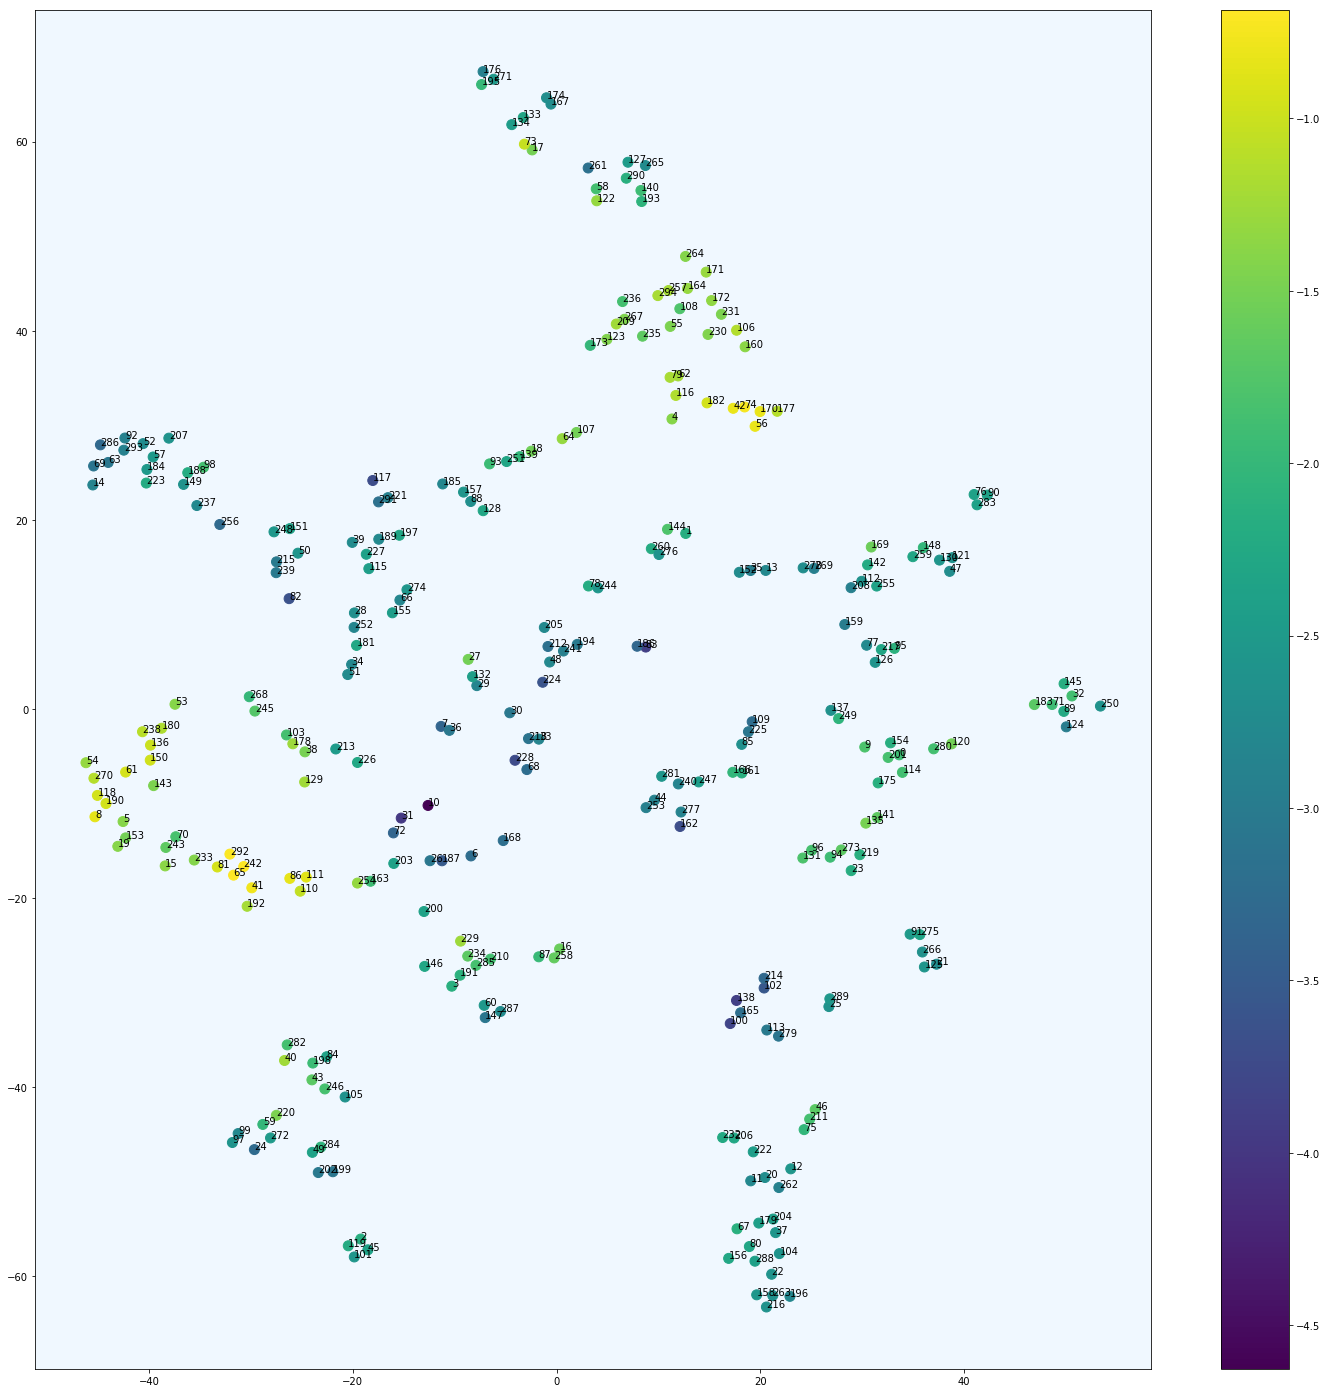

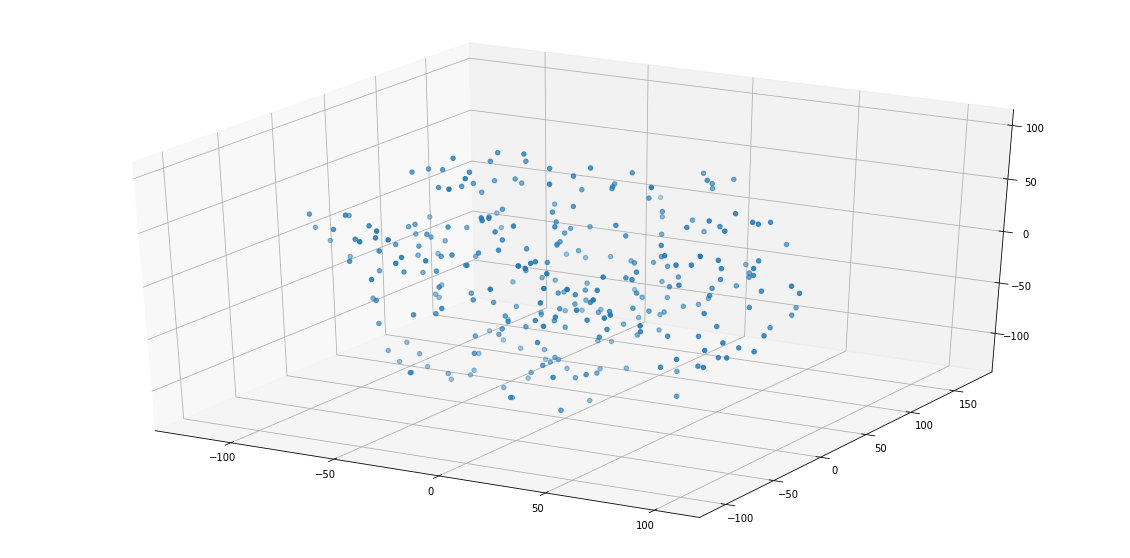

In [98]:
visualize_estimates(estimates, savefig=True, enlight=1)